# Pre-processing

In [447]:
import pandas as pd
import numpy as np

<h4> โหลดชุดข้อมูล </h4>

In [448]:
data_sets = pd.read_csv('./cow.csv')

In [449]:
data_sets.columns

Index(['surgery', 'age', 'hospital_number', 'temperature', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome Class', 'surgical_lesion', 'lesion'],
      dtype='object')

In [450]:
data_sets.shape

(299, 25)

<h4> จัดการค่า NaN และ map input ให้เป็นตัวเลข </h4>

In [451]:
feture_cols = ['surgery', 
               'age', 
               'temperature', 
               'pulse', 
               'respiratory_rate', 
               'temp_of_extremities', 
               'peripheral_pulse', 
               'mucous_membrane', 
               'capillary_refill_time',
               'pain',
               'peristalsis',
               'abdominal_distention',
               'nasogastric_tube',
               'nasogastric_reflux',
               'rectal_exam_feces',
               'abdomen',
               'packed_cell_volume', 
               'total_protein', 
               'abdomo_appearance',
               'abdomo_protein',
               'surgical_lesion',
               'lesion', 
               'outcome Class']

In [452]:
df = data_sets[feture_cols].copy()
df.surgery = df.surgery.map({
    'no' : 0, 
    'yes' : 1
    })
df.age = df.age.map({
    'young' : 0, 
    'adult' : 1
    })
df.loc[df.temperature.isnull(), 'temperature'] = 37.8
df.loc[df.pulse.isnull(), 'pulse'] = int(np.random.randint(30, 40, size=1)) 
df.loc[df.respiratory_rate.isnull(), 'respiratory_rate'] = int(np.random.randint(8, 10, size=1)) 
df.temp_of_extremities = df.temp_of_extremities.map({
    'normal':0, 
    'warm':1, 
    'cool' : 2, 
    'cold' : 3,
    np.nan : 0,
    })
df.mucous_membrane = df.mucous_membrane.map({
    'normal_pink': 1, 
    'bright_pink': 2, 
    'pale_pink': 3,
    'pale_cyanotic':4, 
    'bright_red': 5, 
    'dark_cyanotic': 6,
    np.nan : 1
    })
df.peripheral_pulse = df.peripheral_pulse.map({
    'normal' : 1, 
    'increased' : 2, 
    'reduced' : 3, 
    'absent' : 4,
    np.nan : 1
    })
df.capillary_refill_time = df.capillary_refill_time.map({
    'less_3_sec' : 1,
    'more_3_sec' : 2,
    '3' : 2,
    np.nan : 1
})
df.pain = df.pain.map({
    'alert' : 1,
    'depressed' : 2,
    'extreme_pain' : 3,
    'mild_pain' : 4,
    'severe_pain' : 5,
    np.nan : 0
})
df.peristalsis = df.peristalsis.map({
    'hypermotile' : 1,
    'normal' : 2,
    'hypomotile' : 3,
    'absent' : 4,
    np.nan : 2
})
df.abdominal_distention = df.abdominal_distention.map({
    'none' : 1,
    'slight' : 2,
    'moderate' : 3,
    'severe' : 4,
    np.nan : 1
})
df.nasogastric_tube = df.nasogastric_tube.map({
    'none' : 1,
    'slight' : 2,
    'significant' : 3,
    np.nan : 1
})
df.nasogastric_reflux = df.nasogastric_reflux.map({
    'none' : 1,
    'more_1_liter' : 2,
    'less_1_liter' : 3,
    np.nan : 1
})
df.rectal_exam_feces = df.rectal_exam_feces.map({
    'normal' : 1,
    'increased' : 2,
    'decreased' : 3,
    'absent' : 4,
    np.nan : 1
})
df.abdomen = df.abdomen.map({
    'normal' : 1,
    'other' : 2,
    'firm' : 3,
    'distend_small' : 4,
    'distend_large' : 5,
    np.nan : 1
})
df.loc[df.packed_cell_volume.isnull(), 'packed_cell_volume'] = int(np.random.randint(30, 50, size=1)) 
df.loc[df.total_protein.isnull(), 'total_protein'] = float((7.5 - 6) * np.random.random_sample(1) + 6)
df.abdomo_appearance = df.abdomo_appearance.map({
    'clear' : 1,
    'cloudy' : 2,
    'serosanguious' : 3,
    np.nan : 1
})
df.loc[df.abdomo_protein.isnull(), 'abdomo_protein'] = 3
df.surgical_lesion = df.surgical_lesion.map({
    'yes' : 1,
    'no' : 2
})

# df = df.drop(df[df.isnull().sum(axis=1) > 0].index)

In [453]:
# check NaN
[df.isnull().sum(axis=0) > 0]

[surgery                  False
 age                      False
 temperature              False
 pulse                    False
 respiratory_rate         False
 temp_of_extremities      False
 peripheral_pulse         False
 mucous_membrane          False
 capillary_refill_time    False
 pain                     False
 peristalsis              False
 abdominal_distention     False
 nasogastric_tube         False
 nasogastric_reflux       False
 rectal_exam_feces        False
 abdomen                  False
 packed_cell_volume       False
 total_protein            False
 abdomo_appearance        False
 abdomo_protein           False
 surgical_lesion          False
 lesion                   False
 outcome Class            False
 dtype: bool]

In [454]:
[i for i in np.array(data_sets.columns) if i not in np.array(feture_cols)]

['hospital_number', 'nasogastric_reflux_ph']

In [455]:
df['outcome Class'].value_counts()

lived         178
died           77
euthanized     44
Name: outcome Class, dtype: int64

In [456]:
X = df
y = X['outcome Class'].values
X = X.drop(['outcome Class'], axis=1)

In [457]:
classes = ['lived', 'died', 'euthanized']

In [458]:
y[y=='lived'] = 1
y[y=='died'] = 2
y[y=='euthanized'] = 3
y = y.astype('int')

# แยกข้อมูลฝึก/ทดสอบ

In [459]:
# split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [460]:
y_train = y_train.astype('int')

# Function

In [461]:
from sklearn import metrics

def plotCM(y_test, pred, labels, size=(5,5)):

    confusion_matrix = metrics.confusion_matrix(pred, y_test) # invert exis from test, pred to pred test
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, 
                    display_labels = labels,)
    fig, ax = plt.subplots(figsize=size)
    cm_display.plot(ax=ax, xticks_rotation='vertical')
    # invert exis x,y
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

In [462]:
from sklearn.metrics import classification_report

def report(y_true, y_pred, labels) :
    print(classification_report(y_true, y_pred, target_names=labels))


# การทดลองที่ 1

สร้างโมเดล Decision Tree เรียนรู้ชุดข้อมูลฝึก

In [463]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn import tree

In [464]:
param_grid = { 'criterion':['gini','entropy'], 'max_depth': np.arange(3, 100)}
dtree_model = DecisionTreeClassifier()
dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=10)
dtree_gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87,
       88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [465]:
dtree_gscv.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [466]:
dtree_gscv.best_score_

0.682608695652174

In [467]:
model_1 = dtree_gscv.best_estimator_

[Text(0.5416666666666666, 0.875, 'x[17] <= 9.05\nentropy = 1.382\nsamples = 239\nvalue = [139, 62, 38]'),
 Text(0.3333333333333333, 0.625, 'x[16] <= 44.5\nentropy = 1.343\nsamples = 171\nvalue = [92, 62, 17]'),
 Text(0.16666666666666666, 0.375, 'x[5] <= 1.5\nentropy = 0.913\nsamples = 72\nvalue = [57, 11, 4]'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.414\nsamples = 48\nvalue = [44, 4, 0]'),
 Text(0.25, 0.125, 'entropy = 1.428\nsamples = 24\nvalue = [13, 7, 4]'),
 Text(0.5, 0.375, 'x[21] <= 3111.5\nentropy = 1.408\nsamples = 99\nvalue = [35, 51, 13]'),
 Text(0.4166666666666667, 0.125, 'entropy = 1.324\nsamples = 52\nvalue = [29, 18, 5]'),
 Text(0.5833333333333334, 0.125, 'entropy = 1.172\nsamples = 47\nvalue = [6, 33, 8]'),
 Text(0.75, 0.625, 'x[21] <= 700.0\nentropy = 0.892\nsamples = 68\nvalue = [47, 0, 21]'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 21\nvalue = [21, 0, 0]'),
 Text(0.8333333333333334, 0.375, 'x[20] <= 1.5\nentropy = 0.992\nsamples = 47\nvalue 

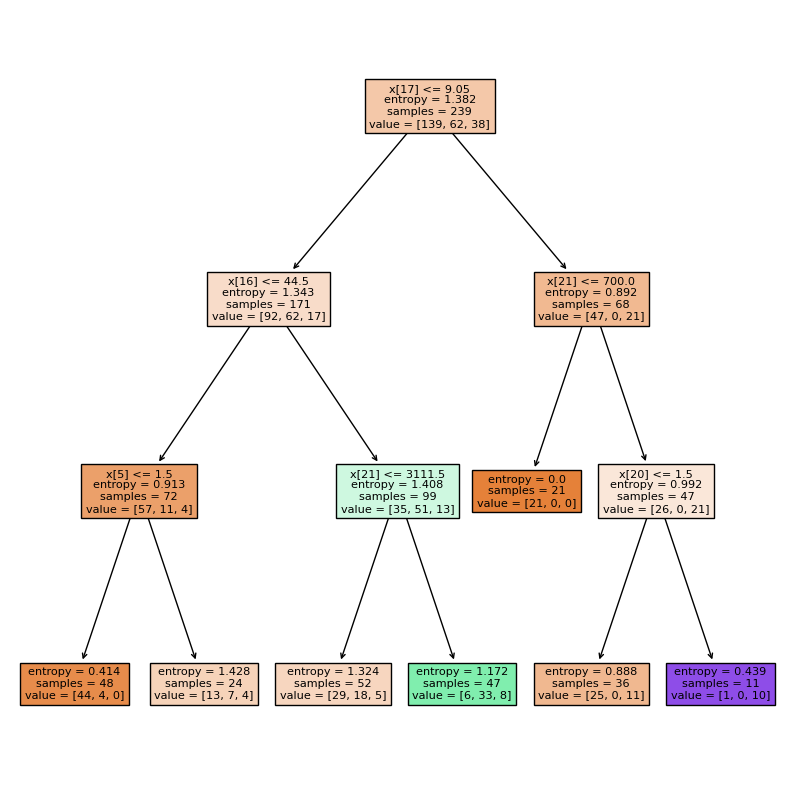

In [468]:
fig = plt.figure(figsize=(10,10))
tree.plot_tree(model_1, filled=True)

In [469]:
y_pred_1 = model_1.predict(X_test)

In [470]:
report(y_pred_1, y_test, classes)

              precision    recall  f1-score   support

       lived       0.95      0.73      0.82        51
        died       0.33      0.56      0.42         9
  euthanized       0.00      0.00      0.00         0

    accuracy                           0.70        60
   macro avg       0.43      0.43      0.41        60
weighted avg       0.86      0.70      0.76        60



c:\Users\USER\anaconda3\envs\envtf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USER\anaconda3\envs\envtf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USER\anaconda3\envs\envtf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


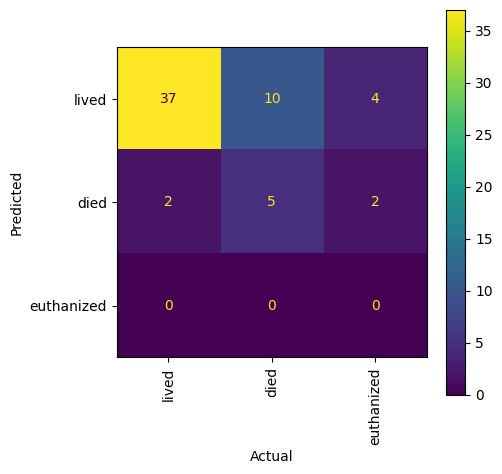

In [471]:
plotCM(pred=y_pred_1, y_test=y_test, labels=classes)

## สรุปการทดลองที่ 1

จากการทดลองที่ 1 จะเห็นได้ว่าประสิทธภาพของโมเดลนั้นค่อนข้างดี แต่เมื่อสังเกต confusion matrix จะพบว่าข้อมูลตัวอย่างส่วนใหญ่จะอยู่ใน class lived ซึ่งเป็นปัญหา Imbalance

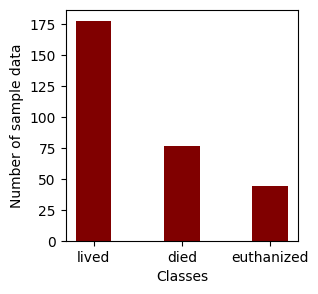

In [472]:
import numpy as np
import matplotlib.pyplot as plt

courses = classes
values = np.array(df['outcome Class'].value_counts())
  
fig = plt.figure(figsize = (3, 3))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',width = 0.4)
 
plt.xlabel("Classes")
plt.ylabel("Number of sample data")

plt.show()

In [473]:
df['outcome Class'].value_counts()

1    178
2     77
3     44
Name: outcome Class, dtype: int64

# use oversampling using SMOTE to increase data for training set 

In [474]:
from imblearn .over_sampling import SMOTE

sm = SMOTE()
X_resampled, y_resampled = sm.fit_resample(X_train,y_train)

In [475]:
param_grid = { 'criterion':['gini','entropy'], 'max_depth': np.arange(3, 100)}
dtree_gscv = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10)
dtree_gscv.fit(X_resampled, y_resampled)
dtree_gscv.best_params_

{'criterion': 'entropy', 'max_depth': 47}

In [476]:
dtree_gscv.best_score_

0.801451800232288

In [477]:
y_pred = dtree_gscv.best_estimator_.predict(X_test)
np.sum(y_pred == y_test)/y_test.size

0.6833333333333333